
#                              CIA Factbook Data Analysis and Visualization

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Country_data.csv')
df=df.replace('unknown',np.nan)

# Data Preparation

In [3]:
# These are the Columns which contain the numerical values i.e without any character.

col=['GDP - real growth rate','Gross national saving', 'Industrial production growth rate','Unemployment rate',
       'Distribution of family income - Gini index',
       'Taxes and other revenues', 'Budget surplus (+) or deficit (-)',
       'Public debt', 'Inflation rate (consumer prices)','Telephones - fixed lines',
       'Telephones - mobile cellular', 'Internet users',
       'Broadband - fixed subscriptions', 'GDP (purchasing power parity)', 'GDP - per capita (PPP)','Labor force','Stock of narrow money', 'Stock of broad money',
       'Stock of domestic credit', 'Market value of publicly traded shares',
       'Current account balance', 'Exports', 'Imports',
       'Reserves of foreign exchange and gold', 'Debt - external',
       'Stock of direct foreign investment - at home',
       'Stock of direct foreign investment - abroad',
       'Electricity - production', 'Electricity - consumption',
       'Electricity - exports', 'Electricity - imports',
       'Electricity - installed generating capacity','Crude oil - production','Crude oil - exports', 'Crude oil - imports',
       'Crude oil - proved reserves',
       'Refined petroleum products - production',
       'Refined petroleum products - consumption',
       'Refined petroleum products - exports',
       'Refined petroleum products - imports', 'Natural gas - production',
       'Natural gas - consumption', 'Natural gas - exports',
       'Natural gas - imports', 'Natural gas - proved reserves',
       'Carbon dioxide emissions from consumption of energy', 'Area','Population','Airports',
       'Railways', 'Roadways','Military expenditures', 'Median age',
       'Population growth rate', 'Birth rate', 'Death rate',
       'Net migration rate', 'Maternal mortality rate',
       'Infant mortality rate', 'Life expectancy at birth',
       'Total fertility rate', 'Education expenditures','Merchant marine',
          'Unemployment, youth ages 15-24','Children under the age of 5 years underweight','Obesity - adult prevalence rate',
          'Electricity - from fossil fuels','Electricity - from nuclear fuels','Electricity - from hydroelectric plants',
          'Electricity - from other renewable sources' ,
          'Central bank discount rate','Commercial bank prime lending rate' ]

In [4]:
# Removing all the unnecessary thing which are present in the dataframe 
for i in col:
    df[i]=df[i].str.replace(',','')
    df[i]=df[i].str.replace('$','')
    df[i]=df[i].str.replace('(','')
    df[i]=df[i].str.replace(')','')
    

In [5]:
# converting the dataframes into numeric value
for i in col:
   df[i]=pd.to_numeric(df[i])

In [6]:
# df_col is the dataframe which contain the column in which the numbers are present
df_col=df[col]
df_col

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Merchant marine,"Unemployment, youth ages 15-24",Children under the age of 5 years underweight,Obesity - adult prevalence rate,Electricity - from fossil fuels,Electricity - from nuclear fuels,Electricity - from hydroelectric plants,Electricity - from other renewable sources,Central bank discount rate,Commercial bank prime lending rate
0,2.7,22.7,-1.9,23.9,29.4,11.2,-15.1,7.0,5.0,118769.0,...,NaN,17.6,25.0,5.5,45.0,0.0,52.0,4.0,NaN,15.00
1,3.8,15.9,6.8,13.8,29.0,27.6,-2.0,71.8,2.0,247010.0,...,60.0,31.9,1.5,21.7,5.0,0.0,95.0,0.0,1.25,8.22
2,1.4,37.8,0.6,11.7,35.3,32.3,-9.6,27.5,5.6,3130090.0,...,106.0,25.7,3.0,27.4,96.0,0.0,1.0,2.0,4.00,8.00
3,-1.1,NaN,NaN,3.7,NaN,69.0,-6.9,41.0,-0.9,38411.0,...,NaN,NaN,NaN,25.6,61.0,0.0,23.0,15.0,NaN,NaN
4,-2.5,28.6,2.5,6.6,42.7,29.3,-6.7,65.0,29.8,161070.0,...,55.0,39.4,19.0,8.2,34.0,0.0,64.0,2.0,9.00,15.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,6.8,29.0,8.0,2.2,34.8,24.8,-6.7,58.5,3.5,4526077.0,...,1863.0,7.3,14.1,2.1,56.0,0.0,43.0,1.0,4.25,7.07
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,NaN,NaN
194,-5.9,-1.9,8.9,27.0,37.9,9.0,-5.2,74.5,24.7,1165828.0,...,31.0,24.5,39.9,17.1,79.0,0.0,0.0,21.0,NaN,30.00
195,3.4,38.3,4.7,15.0,57.5,17.4,-7.3,63.1,6.6,101444.0,...,1.0,24.0,14.9,8.1,5.0,0.0,93.0,2.0,9.10,12.50


## Converting my dataframe into a standardized dataframe
### Here I am passing my dataframe into a pipeline (which is contaning Imputer and standard Scaler)

In [9]:
# IMPUTER HELPS IN DEALING WITH THE NULL VALUES
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

data_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler',StandardScaler())])
Z_array = data_pipeline.fit_transform(df_col)  #This converts it into numpy array
standardized_df = pd.DataFrame(Z_array, columns=df_col.columns, index=df_col.index) #Converts it back to a Pandas dataframe


In [10]:
# Standardized Dataframe
standardized_df

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Merchant marine,"Unemployment, youth ages 15-24",Children under the age of 5 years underweight,Obesity - adult prevalence rate,Electricity - from fossil fuels,Electricity - from nuclear fuels,Electricity - from hydroelectric plants,Electricity - from other renewable sources,Central bank discount rate,Commercial bank prime lending rate
0,-0.070777,0.171114,-0.830427,1.283169,-1.239313,-1.161292,-1.309085,-1.527927,-0.077232,-0.268867,...,-0.324021,0.044891,1.638598,-1.310161,-0.591907,-0.30336,0.971176,-0.475180,-0.136536,0.585396
1,0.113677,-0.497277,0.536589,0.308863,-1.292026,-0.076018,0.212354,0.481541,-0.115572,-0.261719,...,-0.359346,1.383108,-1.245442,0.199233,-1.980071,-0.30336,2.540884,-0.772710,-0.924985,-0.296059
2,-0.288767,1.655335,-0.437606,0.106284,-0.461803,0.235006,-0.670313,-0.892216,-0.069563,-0.101027,...,-0.318722,0.802902,-1.061354,0.730316,1.178002,-0.30336,-0.890569,-0.623945,-0.346789,-0.324660
3,-0.707979,-0.040215,-0.036929,-0.665444,-0.086226,2.663639,-0.356734,-0.473576,-0.152634,-0.273346,...,-0.324021,-0.217138,-0.177733,0.562606,-0.036642,-0.30336,-0.087463,0.343028,-0.136536,-0.226504
4,-0.942737,0.751042,-0.139063,-0.385693,0.513379,0.036480,-0.333506,0.270671,0.239713,-0.266509,...,-0.363762,2.084970,0.902247,-1.058596,-0.973653,-0.30336,1.409234,-0.623945,0.704476,0.692002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.616731,0.790359,0.725143,-0.810143,-0.527694,-0.261308,-0.333506,0.069104,-0.096402,-0.023220,...,1.232926,-0.919000,0.300895,-1.626948,-0.210162,-0.30336,0.642633,-0.698328,-0.294226,-0.445568
193,-0.012087,-0.040215,-0.036929,-0.342283,-0.086226,-0.155428,0.131056,-0.172776,-0.110460,-0.252462,...,-0.324021,-0.217138,-0.177733,0.092085,1.316818,-0.30336,-0.927074,-0.772710,-0.136536,-0.226504
194,-1.512866,-2.246888,0.866559,1.582214,-0.119172,-1.306878,-0.159295,0.565269,0.174535,-0.210508,...,-0.384957,0.690604,3.467202,-0.229360,0.588032,-0.30336,-0.927074,0.789324,-0.136536,2.535516
195,0.046603,1.704482,0.206620,0.424622,2.463743,-0.751005,-0.403190,0.211752,-0.056783,-0.269833,...,-0.411450,0.643813,0.399075,-1.067913,-1.980071,-0.30336,2.467874,-0.623945,0.725501,0.260376


In [11]:
standardized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 72 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GDP - real growth rate                               197 non-null    float64
 1   Gross national saving                                197 non-null    float64
 2   Industrial production growth rate                    197 non-null    float64
 3   Unemployment rate                                    197 non-null    float64
 4   Distribution of family income - Gini index           197 non-null    float64
 5   Taxes and other revenues                             197 non-null    float64
 6   Budget surplus (+) or deficit (-)                    197 non-null    float64
 7   Public debt                                          197 non-null    float64
 8   Inflation rate (consumer prices)                     197 non-null    f

# Different aspects of data via 5 Plots

## 1. Scatter Plots

### Scatter plots are widely used to represent relations among variables and how change in one affects the other.

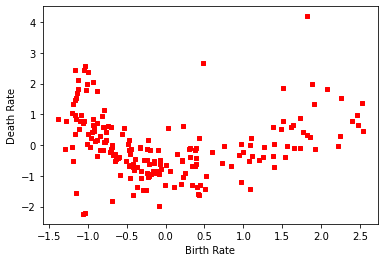

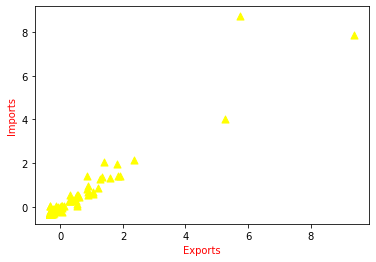

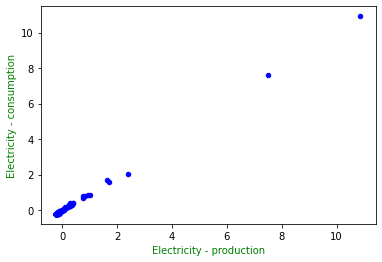

In [183]:
import matplotlib.pyplot as plt 

#Scatter plots are widely used to represent relation among variables and how change in one affects the other.

x =standardized_df['Birth rate']
y =standardized_df['Death rate']
plt.scatter(x, y, c ="Red",marker='s',s = 10) 

plt.xlabel("Birth Rate") 
plt.ylabel("Death Rate")

# To show the plot 
plt.show() 

x1=standardized_df['Exports']
y1=standardized_df['Imports']
plt.scatter(x1, y1, c ="yellow", 
            marker ="^", 
            s = 50) 
plt.xlabel("Exports",c="Red") 
plt.ylabel("Imports",c="Red") 

plt.show() 


x2 =standardized_df['Electricity - production']
y2 =standardized_df['Electricity - consumption']
plt.scatter(x2, y2, c ="blue",s = 20) 

plt.xlabel("Electricity - production",c="Green") 
plt.ylabel("Electricity - consumption",c="Green") 

plt.show() 


## Ques ]
### (a.)Is population is increasing or not??
### (b) Is Net rate by which goods are exported is increasing or not??
### (c) Are we producing more electricity or not (when compared with consumption rate)??

# 2. Histogram

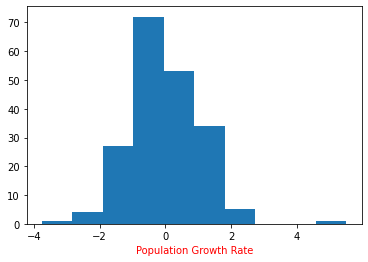

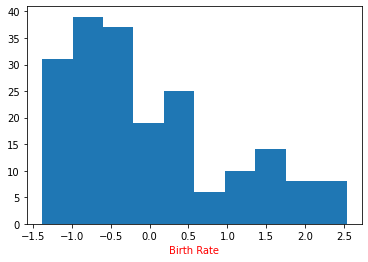

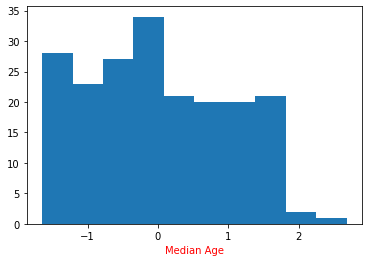

In [163]:
##It is accurate method for the graphical representation of numerical data distribution.
# It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about 
#frequency

plt.hist(standardized_df['Population growth rate'])
plt.xlabel('Population Growth Rate',c="Red")
plt.show()

plt.hist(standardized_df['Birth rate'])
plt.xlabel('Birth Rate',c="Red")
plt.show()

plt.hist(standardized_df['Median age'])
plt.xlabel('Median Age',c="Red")
plt.show()


## Ques.]  Which plot can be identify as normally Distributed??

## 3. Box and whisker plot

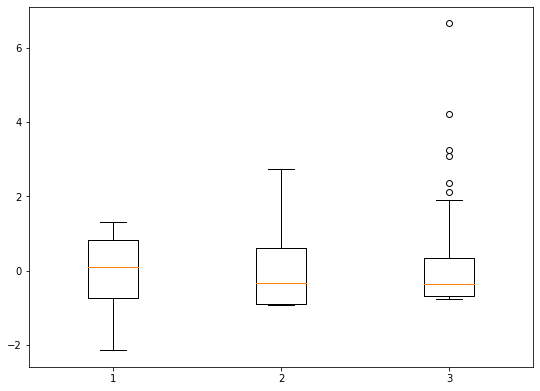

In [175]:
## Box Plot is the visual representation of the depicting groups of numerical data through their quartiles. 
# It captures the summary of the data efficiently with a simple box and whiskers and allows us to compare 
# easily across groups. 
## Boxplot summarizes a sample data using 25th, 50th and 75th percentiles.

data_1 = standardized_df['Electricity - from fossil fuels']
data_2 = standardized_df['Electricity - from hydroelectric plants']
data_3 = standardized_df['Electricity - from other renewable sources']
data = [data_1, data_2, data_3] 
fig = plt.figure(figsize =(7, 5)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 

# Creating plot 
bp = ax.boxplot(data) 

# show plot 
plt.show() 


## Ques. ] From which source we are producing the max. electricity ??

# 4. Pie Chart

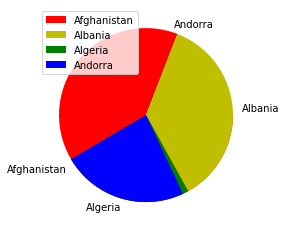

In [196]:

import matplotlib.pyplot as plt 
# Taking the First Four Country  

activities =df['Country Name'].head(4).to_list()
  
# portion covered by each label 
slices = standardized_df['GDP - per capita (PPP)'].head(4).to_list()
  

colors = ['r', 'y', 'g', 'b'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors) 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 

## Ques. ] Which country has the most Gdp per-capita ??

# 5. Bar Chart

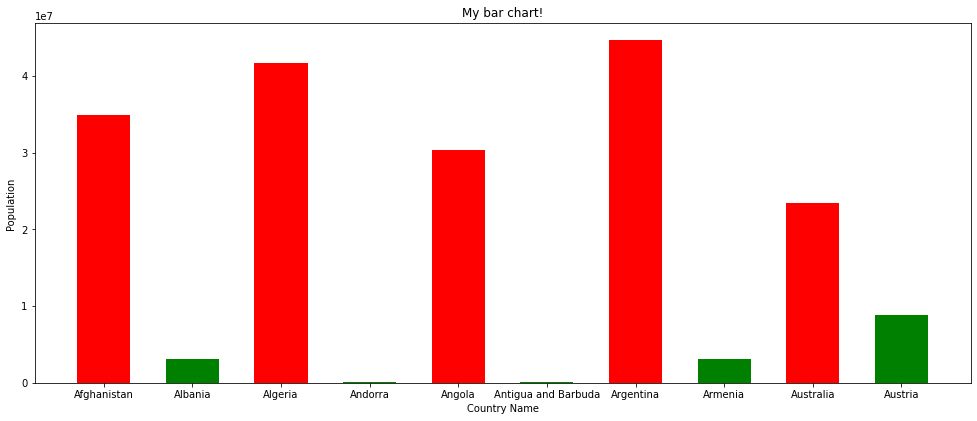

In [215]:
# comparing the population of top 10 country

left = [1, 2, 3, 4, 5,6,7,8,9,10] 
  
# heights of bars 
height = df['Population'].head(10).to_list() 
  
# labels for bars 
tick_label = []
for i in df['Country Name'].head(10):
    tick_label.append(i)
    
fig = plt.figure(figsize =(13, 5)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 

  
# plotting a bar chart 
ax.bar(left, height, tick_label = tick_label,
        width = 0.6, color = ['red', 'green']) 
  
# naming the x-axis 
plt.xlabel('Country Name') 
# naming the y-axis 
plt.ylabel('Population ') 
# plot title 
plt.title('My bar chart!') 
  
# function to show the plot 
plt.show() 

## Ques. ] Which Country has the most population ??

# Pairwise correalation on all pairs of numerical Variables

In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

# Pearson's correlation

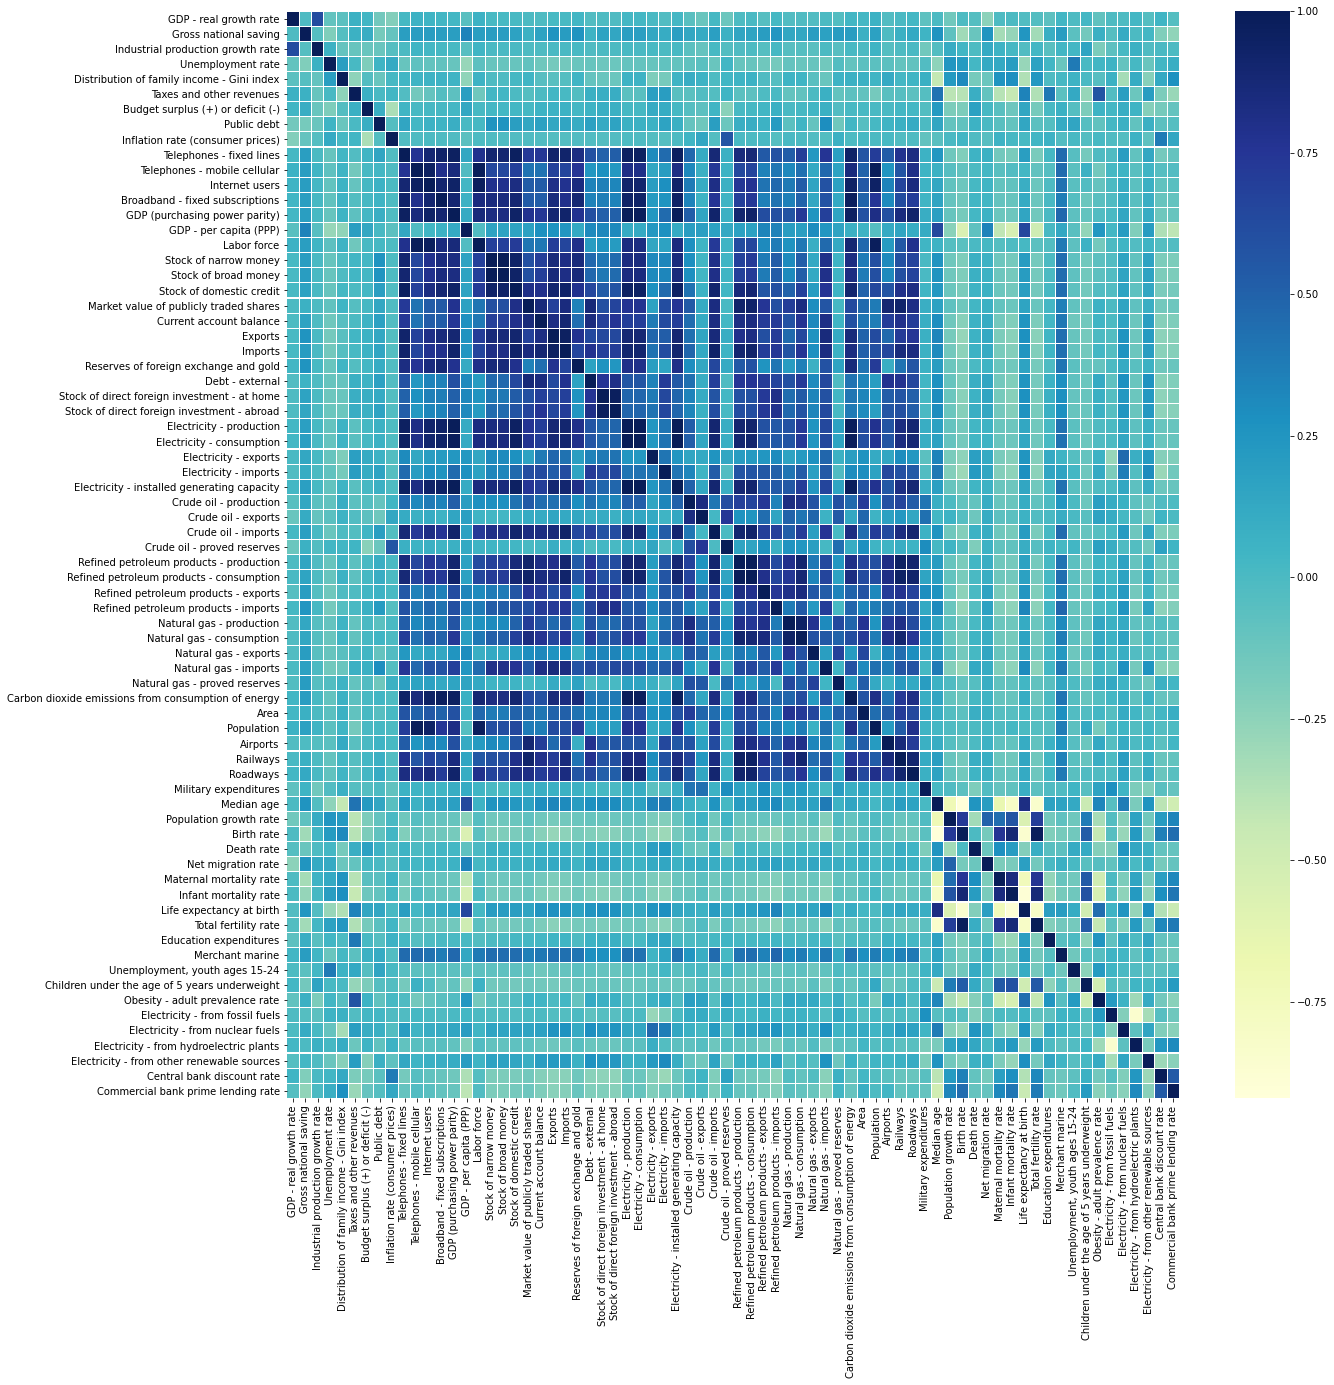

In [15]:
corrmat = standardized_df.corr(method ='pearson') 

f, ax = plt.subplots(figsize =(20, 20)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


In [16]:
pearson = standardized_df.corr(method ='pearson')

In [17]:
pearson

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Merchant marine,"Unemployment, youth ages 15-24",Children under the age of 5 years underweight,Obesity - adult prevalence rate,Electricity - from fossil fuels,Electricity - from nuclear fuels,Electricity - from hydroelectric plants,Electricity - from other renewable sources,Central bank discount rate,Commercial bank prime lending rate
GDP - real growth rate,1.000000,-0.009586,0.624870,-0.092386,-0.064904,0.069729,0.033010,-0.154492,-0.213948,0.018435,...,0.037255,-0.009201,0.027731,-0.086128,-0.005505,-0.006543,0.030623,-0.041856,0.042181,-0.040498
Gross national saving,-0.009586,1.000000,-0.038135,-0.202938,-0.035380,0.070418,0.095282,-0.167267,-0.098901,0.192177,...,0.201031,-0.062904,-0.150535,0.081565,-0.039267,0.112285,-0.004839,0.028853,-0.207540,-0.257037
Industrial production growth rate,0.624870,-0.038135,1.000000,0.070447,-0.099684,-0.108669,-0.113501,-0.113311,-0.040849,0.001467,...,0.039271,0.024773,0.157131,-0.191999,-0.066526,0.012130,0.074888,-0.014761,0.005994,-0.001110
Unemployment rate,-0.092386,-0.202938,0.070447,1.000000,0.194542,0.013699,-0.193628,0.049211,0.121661,-0.108898,...,-0.117424,0.385699,0.013690,0.036197,0.062174,-0.095961,0.019885,-0.110457,0.037986,0.091086
Distribution of family income - Gini index,-0.064904,-0.035380,-0.099684,0.194542,1.000000,-0.245991,-0.030716,-0.112996,0.019540,0.036826,...,0.023510,0.060806,0.005703,-0.046535,0.072976,-0.325437,0.107130,-0.227338,0.128873,0.274865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Electricity - from nuclear fuels,-0.006543,0.112285,0.012130,-0.095961,-0.325437,0.193426,0.096340,0.084574,-0.031959,0.198427,...,0.032524,0.005697,-0.083965,0.056084,-0.212149,1.000000,-0.066092,0.147715,-0.203591,-0.233865
Electricity - from hydroelectric plants,0.030623,-0.004839,0.074888,0.019885,0.107130,-0.121622,0.050181,-0.084597,0.067394,-0.085708,...,-0.075112,-0.025406,0.045238,-0.303164,-0.847600,-0.066092,1.000000,-0.176907,0.240562,0.314396
Electricity - from other renewable sources,-0.041856,0.028853,-0.014761,-0.110457,-0.227338,0.203758,-0.222666,0.081770,-0.075944,0.133311,...,0.041860,-0.048033,0.021057,0.111005,-0.325375,0.147715,-0.176907,1.000000,-0.293965,-0.231571
Central bank discount rate,0.042181,-0.207540,0.005994,0.037986,0.128873,-0.189832,-0.169788,-0.058232,0.383362,-0.155529,...,-0.131531,-0.067749,0.075821,-0.148555,-0.047522,-0.203591,0.240562,-0.293965,1.000000,0.536688


# Converting the above dataframe into a given Format

In [18]:
colname=[]
for (columnName) in corrmat.iteritems():
        colname.append(columnName[0])
        
# Filling the variable 1 column
var1=[]
var2=[]
pear_coeff=[]
pear_abs_coeff=[]
c=71
j=0
for j in range(0,72):
  c=71
  c=c-j 
  for i in range(0,c):
      var1.append(colname[j])
    

In [19]:
# Filling the variable 2 column

c=72
for j in range(0,72):
   for i in range(j+1,c):
      var2.append(colname[i])

In [20]:
# filling the pear_coeff column
c=72
k=0
for (j) in (range(0,72)):
   for i in range(j+1,c):
     pear_coeff.append(corrmat[var1[k]][i])
     k=k + 1

In [21]:
pear_table = pd.DataFrame(list(zip(var1,var2,pear_coeff)), 
               columns =['Variable 1', 'Variable 2','Pearson_coefficient']) 

In [22]:
# Filling the absolute pear coeff column
pear_abs_coeff= [abs(ele) for ele in pear_coeff] 

In [23]:
pear_abs_coeff=pd.Series(pear_abs_coeff)
pear_table['Pearson_abs_coeff']=pear_abs_coeff


In [24]:
pear_table

,Variable 1,Variable 2,Pearson_coefficient,Pearson_abs_coeff
0,GDP - real growth rate,Gross national saving,-0.009586,0.009586
1,GDP - real growth rate,Industrial production growth rate,0.624870,0.624870
2,GDP - real growth rate,Unemployment rate,-0.092386,0.092386
3,GDP - real growth rate,Distribution of family income - Gini index,-0.064904,0.064904
4,GDP - real growth rate,Taxes and other revenues,0.069729,0.069729
...,...,...,...,...
2551,Electricity - from hydroelectric plants,Central bank discount rate,0.240562,0.240562
2552,Electricity - from hydroelectric plants,Commercial bank prime lending rate,0.314396,0.314396
2553,Electricity - from other renewable sources,Central bank discount rate,-0.293965,0.293965
2554,Electricity - from other renewable sources,Commercial bank prime lending rate,-0.231571,0.231571


In [25]:
# sorting the dataframe on the basis of pearson abs coeff
pear_table.sort_values("Pearson_abs_coeff", axis = 0, ascending = False, 
                 inplace = True) 


## Top 20 pair

In [26]:
pear_table.head(20)

,Variable 1,Variable 2,Pearson_coefficient,Pearson_abs_coeff
1016,Stock of narrow money,Stock of broad money,0.999999,0.999999
1566,Electricity - production,Electricity - consumption,0.999426,0.999426
1569,Electricity - production,Electricity - installed generating capacity,0.998353,0.998353
1612,Electricity - consumption,Electricity - installed generating capacity,0.998317,0.998317
1926,Refined petroleum products - production,Refined petroleum products - consumption,0.989402,0.989402
701,Telephones - mobile cellular,Population,0.987178,0.987178
858,GDP (purchasing power parity),Electricity - production,0.986861,0.986861
862,GDP (purchasing power parity),Electricity - installed generating capacity,0.986524,0.986524
669,Telephones - mobile cellular,Labor force,0.986125,0.986125
859,GDP (purchasing power parity),Electricity - consumption,0.984572,0.984572


# Spearman’s rank correlation

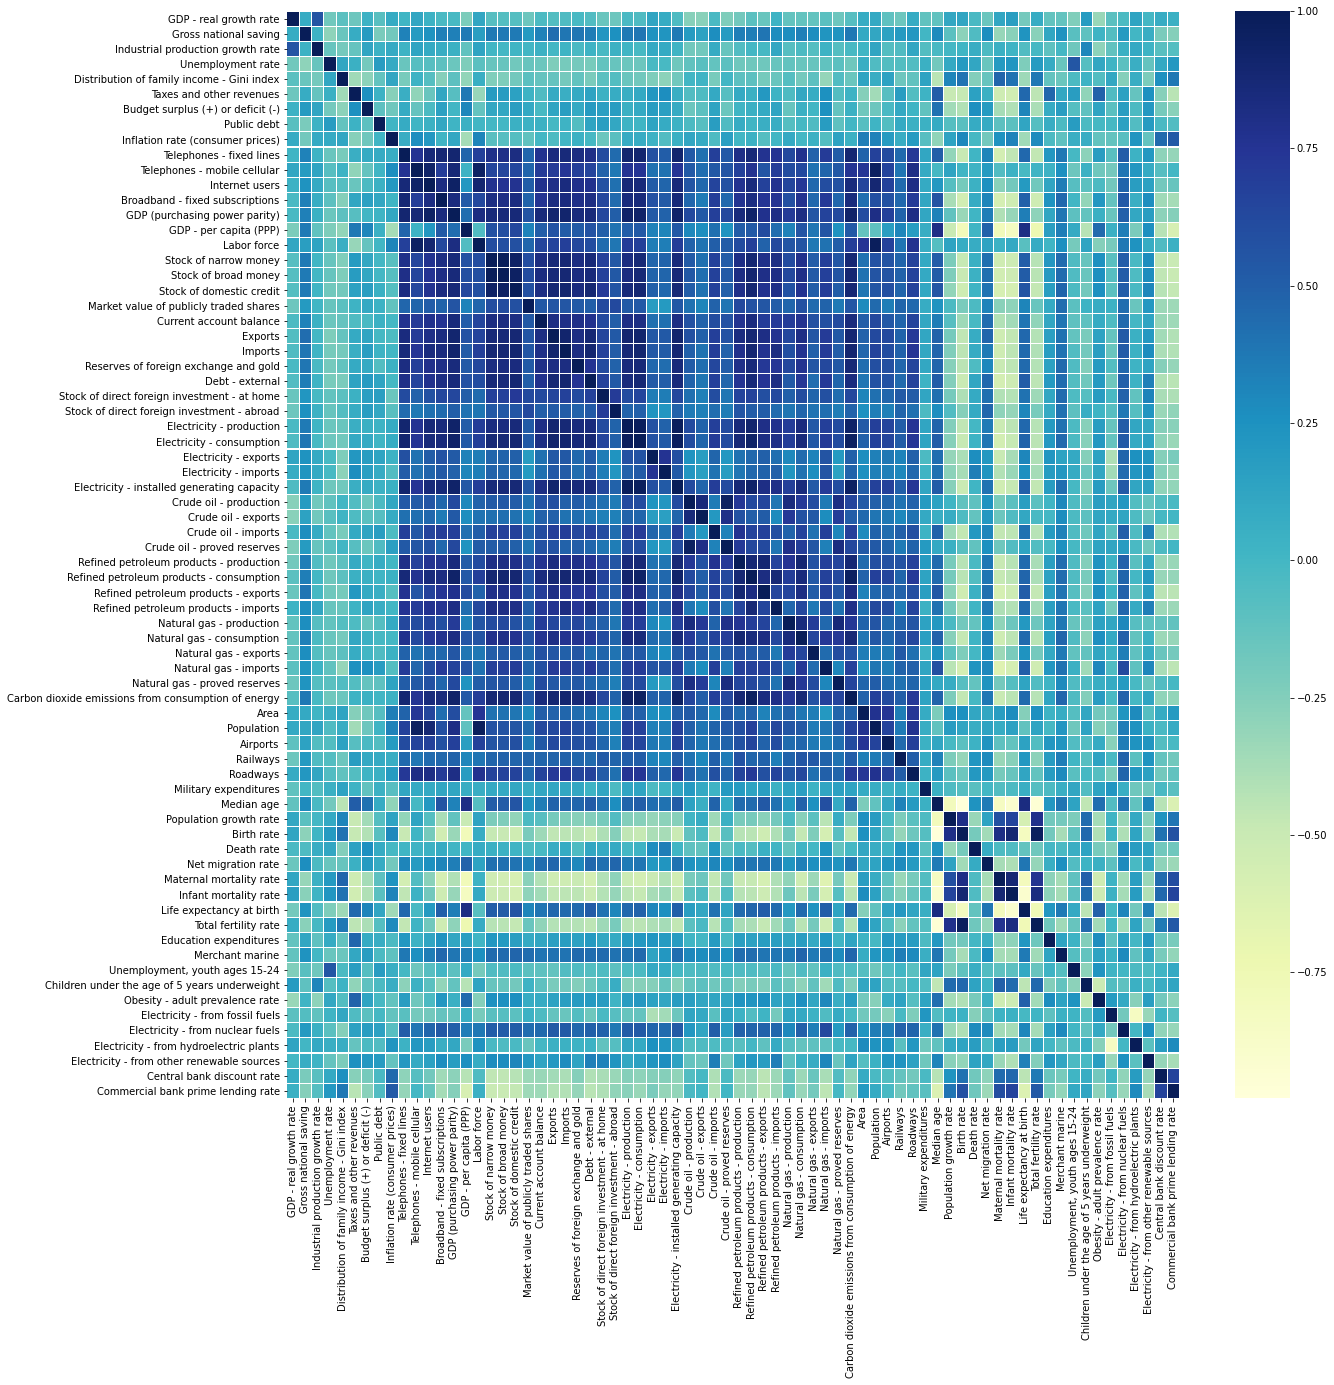

In [27]:
corrmat2 = standardized_df.corr(method ='spearman') 

f, ax = plt.subplots(figsize =(20, 20)) 
sns.heatmap(corrmat2, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [28]:
spearman=standardized_df.corr(method='spearman')

In [29]:
spearman

,GDP - real growth rate,Gross national saving,Industrial production growth rate,Unemployment rate,Distribution of family income - Gini index,Taxes and other revenues,Budget surplus (+) or deficit (-),Public debt,Inflation rate (consumer prices),Telephones - fixed lines,...,Merchant marine,"Unemployment, youth ages 15-24",Children under the age of 5 years underweight,Obesity - adult prevalence rate,Electricity - from fossil fuels,Electricity - from nuclear fuels,Electricity - from hydroelectric plants,Electricity - from other renewable sources,Central bank discount rate,Commercial bank prime lending rate
GDP - real growth rate,1.000000,0.077333,0.562523,-0.182271,-0.094804,-0.166942,0.040956,-0.086867,0.083831,0.013415,...,-0.128854,-0.242896,0.189422,-0.327295,-0.092800,-0.033348,0.130305,0.001009,0.076863,0.056160
Gross national saving,0.077333,1.000000,0.036357,-0.287201,-0.150317,0.079062,0.189151,-0.218283,-0.186057,0.328961,...,0.247024,-0.090298,-0.112556,0.018706,-0.063661,0.200047,0.005824,0.064799,-0.219992,-0.258306
Industrial production growth rate,0.562523,0.036357,1.000000,-0.143405,-0.197794,-0.132510,0.124522,0.033803,0.092161,0.025665,...,-0.003404,-0.168038,0.311726,-0.284313,-0.117391,0.053070,0.096218,0.030354,-0.084686,-0.072716
Unemployment rate,-0.182271,-0.287201,-0.143405,1.000000,0.115785,0.048965,-0.192021,0.187529,0.094717,-0.148900,...,-0.151940,0.550856,-0.070092,0.103017,0.022828,-0.092225,0.058545,-0.136021,0.098689,0.209626
Distribution of family income - Gini index,-0.094804,-0.150317,-0.197794,0.115785,1.000000,-0.348117,-0.281120,-0.122386,0.116724,-0.213168,...,-0.158354,-0.032384,0.026819,-0.061327,0.106890,-0.258459,0.070749,-0.223525,0.263658,0.374083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Electricity - from nuclear fuels,-0.033348,0.200047,0.053070,-0.092225,-0.258459,0.152087,0.173425,0.154397,-0.077798,0.506253,...,0.289155,0.007893,-0.106111,0.102219,-0.185470,1.000000,-0.000432,0.264287,-0.293997,-0.319431
Electricity - from hydroelectric plants,0.130305,0.005824,0.096218,0.058545,0.070749,-0.130079,-0.029849,-0.056596,0.228490,0.034770,...,-0.108023,-0.036155,0.053671,-0.261262,-0.840458,-0.000432,1.000000,-0.092308,0.183877,0.284148
Electricity - from other renewable sources,0.001009,0.064799,0.030354,-0.136021,-0.223525,0.254321,0.204973,0.192210,-0.132062,0.210240,...,0.118387,-0.032499,-0.018410,0.172480,-0.320057,0.264287,-0.092308,1.000000,-0.309349,-0.369221
Central bank discount rate,0.076863,-0.219992,-0.084686,0.098689,0.263658,-0.261715,-0.205157,-0.026472,0.449983,-0.290739,...,-0.209389,0.012118,0.065188,-0.184901,0.015282,-0.293997,0.183877,-0.309349,1.000000,0.665708


# Converting the above dataframe into a given Format

In [30]:
colname=[]
for (columnName) in spearman.iteritems():
        colname.append(columnName[0])
        
# Filling the variable 1 column
var1=[]
var2=[]
spearman_coeff=[]
spearman_abs_coeff=[]
c=71
j=0
for j in range(0,72):
  c=71
  c=c-j 
  for i in range(0,c):
      var1.append(colname[j])
    

In [31]:
# Filling the variable 2 column

c=72
for j in range(0,72):
   for i in range(j+1,c):
      var2.append(colname[i])

In [32]:
# filling the spearman_coeff column
c=72
k=0
for (j) in (range(0,72)):
   for i in range(j+1,c):
     spearman_coeff.append(spearman[var1[k]][i])
     k=k + 1

In [33]:
spearman_table = pd.DataFrame(list(zip(var1,var2,spearman_coeff)), 
               columns =['Variable 1', 'Variable 2','spearman_coefficient']) 

In [34]:
# Filling the absolute spearman coeff column
spearman_abs_coeff= [abs(ele) for ele in spearman_coeff] 

In [35]:
spearman_abs_coeff=pd.Series(spearman_abs_coeff)
spearman_table['spearman_abs_coeff']=spearman_abs_coeff


In [36]:
spearman_table

,Variable 1,Variable 2,spearman_coefficient,spearman_abs_coeff
0,GDP - real growth rate,Gross national saving,0.077333,0.077333
1,GDP - real growth rate,Industrial production growth rate,0.562523,0.562523
2,GDP - real growth rate,Unemployment rate,-0.182271,0.182271
3,GDP - real growth rate,Distribution of family income - Gini index,-0.094804,0.094804
4,GDP - real growth rate,Taxes and other revenues,-0.166942,0.166942
...,...,...,...,...
2551,Electricity - from hydroelectric plants,Central bank discount rate,0.183877,0.183877
2552,Electricity - from hydroelectric plants,Commercial bank prime lending rate,0.284148,0.284148
2553,Electricity - from other renewable sources,Central bank discount rate,-0.309349,0.309349
2554,Electricity - from other renewable sources,Commercial bank prime lending rate,-0.369221,0.369221


In [37]:
# sorting the dataframe on the basis of spearman abs coeff
spearman_table.sort_values("spearman_abs_coeff", axis = 0, ascending = False, 
                 inplace = True) 


## Top 20 pair

In [38]:
spearman_table.head(20)

,Variable 1,Variable 2,spearman_coefficient,spearman_abs_coeff
1016,Stock of narrow money,Stock of broad money,0.992260,0.992260
991,Labor force,Population,0.982338,0.982338
2367,Median age,Birth rate,-0.979712,0.979712
1566,Electricity - production,Electricity - consumption,0.978663,0.978663
1569,Electricity - production,Electricity - installed generating capacity,0.978225,0.978225
1612,Electricity - consumption,Electricity - installed generating capacity,0.973657,0.973657
2408,Birth rate,Total fertility rate,0.972815,0.972815
1968,Refined petroleum products - consumption,Carbon dioxide emissions from consumption of e...,0.963389,0.963389
701,Telephones - mobile cellular,Population,0.961582,0.961582
1626,Electricity - consumption,Carbon dioxide emissions from consumption of e...,0.956671,0.956671


## Explaning why Difference  is observed... 

### We can clearly see that there is a difference in the top 20 pair that are generated by both methods .
### This is because pearson coefficient works  with a linear relationship between the two variables whereas spearman works with monotic relationship as well .
###  Now if our data is not exactly linear then definately some usefull information will be missed by pearson while it will not so happen with spearman. Therefore spearman will rank that sample differently than pearson.
### Now taking the case where our data is exactly linear pearson will be performing well over here and thus there could a chance of missing some information by spearman and thus ranking will be different

# Permutation Test

### Following is the top 100 list by Pearson’s method

In [39]:
top_100=pear_table.head(100)
top_100=top_100.drop(['Pearson_coefficient'],axis=1)
top_100=top_100.drop(['Pearson_abs_coeff'],axis=1)
top_100.reset_index(drop=True, inplace=True)
top_100

,Variable 1,Variable 2
0,Stock of narrow money,Stock of broad money
1,Electricity - production,Electricity - consumption
2,Electricity - production,Electricity - installed generating capacity
3,Electricity - consumption,Electricity - installed generating capacity
4,Refined petroleum products - production,Refined petroleum products - consumption
...,...,...
95,Exports,Electricity - installed generating capacity
96,GDP (purchasing power parity),Exports
97,Labor force,Carbon dioxide emissions from consumption of e...
98,Electricity - installed generating capacity,Refined petroleum products - production


# Following are the Steps to done permutation test

 ###  Firstly,I took two sample  and pulled both sample together and form a joint sample  and then randomly permuted the elements in the sample and split them into two samples and then calculated the mean difference of both samples and stored in the variable ground_truth
  
 ### And then I repeated this above step 1000 times 
###   The p_value is calculated by calculating the percentage of times when the permutated difference are higher than or equal to the ground truth



In [101]:
#perm_test=pd.Dataframe()
pv=[]
for (i,j) in zip(top_100['Variable 1'],top_100['Variable 2']):
    i=standardized_df[i].to_list()
    j=standardized_df[j].to_list()
    np.random.seed(0)
    # CONCATATING BOTH SAMPLE
    concat=np.concatenate([i,j])
    # SHUFFLING THE SAMPLE
    np.random.shuffle(concat)
    ground_truth=np.abs(
                np.mean(concat[ : int(len(concat)/2)])-np.mean(concat[int(len(concat)/2): ] )
               )
    k,p=[],len(concat)
    #  DOING THOUSAND TIMES PERMUTAIONS
    for i in range(0,1000):
      np.random.shuffle(concat)
      k.append(
         np.abs(
                np.mean(concat[ : int(len(concat)/2)])-np.mean(concat[int(len(concat)/2): ] )
               )
          )  
    # CALCULATION PVALUE AND APPENDING IT TO PV.    
    pv.append(len(np.where(k>=ground_truth)[0])/1000)
    

## Below is the table containing Samples along with there P-value 

In [102]:
top_100['P-Value']=pv
top_100

,Variable 1,Variable 2,P-Value
0,Stock of narrow money,Stock of broad money,0.296
1,Electricity - production,Electricity - consumption,0.255
2,Electricity - production,Electricity - installed generating capacity,0.267
3,Electricity - consumption,Electricity - installed generating capacity,0.275
4,Refined petroleum products - production,Refined petroleum products - consumption,0.430
...,...,...,...
95,Exports,Electricity - installed generating capacity,0.233
96,GDP (purchasing power parity),Exports,0.166
97,Labor force,Carbon dioxide emissions from consumption of e...,0.114
98,Electricity - installed generating capacity,Refined petroleum products - production,0.219


# Kolmogorov–Smirnov test

In [103]:
import matplotlib.pyplot as plt
from scipy.stats import kstest

##  With the help of  histogram I  will select the column  that could be a normally distributed  and then with the help of pvalue(>=.005) it can be clear it out whether the data is normally distributed or not 

## Following are the columns that  seems to follow normally distribution

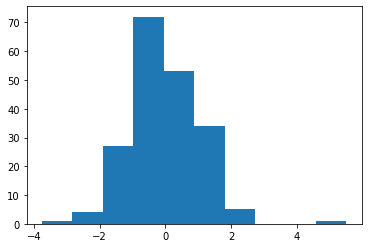

KstestResult(statistic=0.0686182848338871, pvalue=0.2979293631354004)

In [104]:
#It compares the observed versus the expected cumulative relative frequencies of the Normal Distribution. 
#The Kolmogorov-Smirnov test uses the maximal absolute difference between the observed and expected 
#cumulative distribution.
a=standardized_df['Population growth rate']
plt.hist(a)
plt.show()
y = kstest(a, "norm")    
y
# SINCE PVALUE IS GREATER THAN .005 SO WE CAN SAY THAT POPULATION GROWTH RATE IS NORMALLY DISTRIBUTED

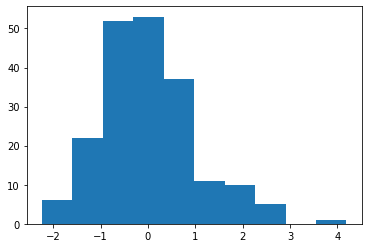

KstestResult(statistic=0.08876800917538086, pvalue=0.0843500920570146)

In [105]:
b=standardized_df['Death rate']
plt.hist(b)
plt.show()
y = kstest(b, "norm")    
y

# SINCE PVALUE IS GREATER THAN .005 SO WE CAN SAY THAT DEATH RATE IS NORMALLY DISTRIBUTED

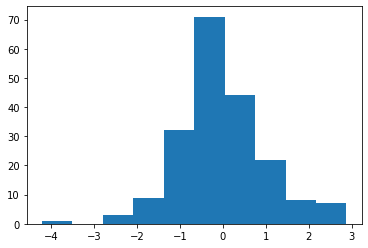

KstestResult(statistic=0.07938837534787657, pvalue=0.1581519979353806)

In [106]:
a=standardized_df['Gross national saving']
plt.hist(a)
plt.show()
y = kstest(a, "norm")    
y
# SINCE PVALUE IS GREATER THAN .005 SO WE CAN SAY THAT Gross national saving IS NORMALLY DISTRIBUTED

## Following are the columns that doesn't seems to follow normally distribution

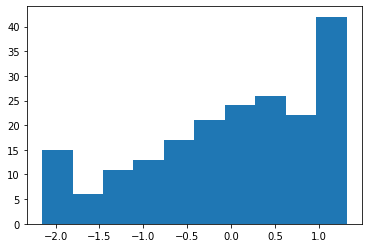

KstestResult(statistic=0.09394982371960059, pvalue=0.057831528459254655)

In [231]:
c=standardized_df['Electricity -']
plt.hist(c)
plt.show()
y = kstest(c, "norm")    
y
# SINCE PVALUE IS LESS THAN .005 SO WE CAN SAY THAT THE DATA IS NOT NORMALLY DISTRIBUTED

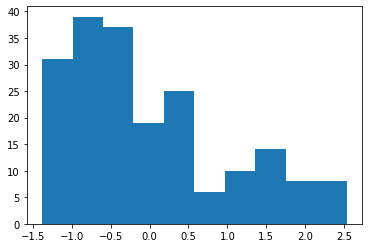

KstestResult(statistic=0.13442084678887511, pvalue=0.001449047720356299)

In [108]:
a=standardized_df['Birth rate']
plt.hist(a)
plt.show()
y = kstest(a, "norm")    
y
# SINCE PVALUE IS LESS THAN .005 SO WE CAN SAY THAT THE DATA IS NOT NORMALLY DISTRIBUTED

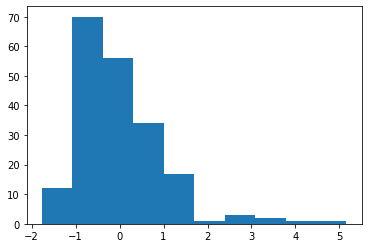

KstestResult(statistic=0.12445807229724071, pvalue=0.0040566171110153725)

In [109]:
a=standardized_df['Taxes and other revenues']
plt.hist(a)
plt.show()
y = kstest(a, "norm")    
y
# SINCE PVALUE IS LESS THAN .005 SO WE CAN SAY THAT THE DATA IS NOT NORMALLY DISTRIBUTED

# Regression model

In [70]:
# TOTAL 71 FEATURES TAKEN
features=['GDP - real growth rate','Gross national saving', 'Industrial production growth rate','Unemployment rate',
       'Distribution of family income - Gini index',
       'Taxes and other revenues', 'Budget surplus (+) or deficit (-)',
       'Public debt', 'Inflation rate (consumer prices)','Telephones - fixed lines',
       'Telephones - mobile cellular', 'Internet users',
       'Broadband - fixed subscriptions', 'GDP (purchasing power parity)','Labor force','Stock of narrow money', 'Stock of broad money',
       'Stock of domestic credit', 'Market value of publicly traded shares',
       'Current account balance', 'Exports', 'Imports',
       'Reserves of foreign exchange and gold', 'Debt - external',
       'Stock of direct foreign investment - at home',
       'Stock of direct foreign investment - abroad',
       'Electricity - production', 'Electricity - consumption',
       'Electricity - exports', 'Electricity - imports',
       'Electricity - installed generating capacity','Crude oil - production','Crude oil - exports', 'Crude oil - imports',
       'Crude oil - proved reserves',
       'Refined petroleum products - production',
       'Refined petroleum products - consumption',
       'Refined petroleum products - exports',
       'Refined petroleum products - imports', 'Natural gas - production',
       'Natural gas - consumption', 'Natural gas - exports',
       'Natural gas - imports', 'Natural gas - proved reserves',
       'Carbon dioxide emissions from consumption of energy', 'Area','Population','Airports',
       'Railways', 'Roadways','Military expenditures', 'Median age',
       'Population growth rate', 'Birth rate', 'Death rate',
       'Net migration rate', 'Maternal mortality rate',
       'Infant mortality rate', 'Life expectancy at birth',
       'Total fertility rate', 'Education expenditures','Merchant marine',
          'Unemployment, youth ages 15-24','Children under the age of 5 years underweight','Obesity - adult prevalence rate',
          'Electricity - from fossil fuels','Electricity - from nuclear fuels','Electricity - from hydroelectric plants',
          'Electricity - from other renewable sources' ,
          'Central bank discount rate','Commercial bank prime lending rate' ]

In [71]:
len(features)

71

In [72]:
# Splitting data into a training and test set. 
from sklearn.model_selection import train_test_split

# Predictors (X)
X=standardized_df[features]
#Response (Y)
Y=standardized_df['GDP - per capita (PPP)']

In [73]:
GDP_train_set, GDP_test_set = train_test_split(standardized_df,test_size=0.2,random_state=0)

#Predictors for training (X)
X_train_set=GDP_train_set[features]
#Response for training (Y)
Y_train_set=GDP_train_set['GDP - per capita (PPP)']

#Predictors for testing (X)
X_test_set=GDP_test_set[features]
#Response for testing (Y)
Y_test_set=GDP_test_set['GDP - per capita (PPP)']

In [74]:
import sklearn.linear_model

In [75]:
lin_model= sklearn.linear_model.LinearRegression()
lin_model.fit(X_train_set,Y_train_set)

LinearRegression()

In [76]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_Y_train_predict = lin_model.predict(X_train_set)
lin_train_mse=mean_squared_error(lin_Y_train_predict,Y_train_set)
lin_train_rmse=np.sqrt(lin_train_mse)
print('Root MSE of the model:',lin_train_rmse, 'Mean of Sales:', Y_train_set.mean())
lin_train_r2=r2_score(Y_train_set, lin_Y_train_predict)
print('R2 score is', lin_train_r2)

Root MSE of the model: 0.3840544002325438 Mean of Sales: -0.04277593664050601
R2 score is 0.8555104979624839


In [77]:
lin_Y_test_predict = lin_model.predict(X_test_set)
lin_test_mse=mean_squared_error(lin_Y_test_predict,Y_test_set)
lin_test_rmse=np.sqrt(lin_test_mse)
print('Root MSE of the model:',lin_test_rmse, 'Mean of Sales:', Y_test_set.mean())
lin_test_r2=r2_score(Y_test_set, lin_Y_test_predict)
print('R2 score is', lin_test_r2)

Root MSE of the model: 1.9764141105736768 Mean of Sales: 0.16789555131398576
R2 score is -3.4242456537328536


# Feature Selection

# OLS Method

In [78]:
# OLS methon is applied on all 71 features
import statsmodels.api as sm
est = sm.OLS(Y_train_set,X_train_set)
est2 = est.fit()
print(est2.summary())

                                   OLS Regression Results                                  
Dep. Variable:     GDP - per capita (PPP)   R-squared (uncentered):                   0.853
Model:                                OLS   Adj. R-squared (uncentered):              0.731
Method:                     Least Squares   F-statistic:                              7.010
Date:                    Thu, 10 Sep 2020   Prob (F-statistic):                    9.95e-17
Time:                            22:15:14   Log-Likelihood:                         -74.203
No. Observations:                     157   AIC:                                      290.4
Df Residuals:                          86   BIC:                                      507.4
Df Model:                              71                                                  
Covariance Type:                nonrobust                                                  
                                                          coef    std err       

### Now I am manually selecting the most pvalue column and removing it and observing the improvement

In [79]:
features1=['GDP - real growth rate','Gross national saving', 'Industrial production growth rate','Unemployment rate',
       'Distribution of family income - Gini index',
       'Taxes and other revenues', 'Budget surplus (+) or deficit (-)',
       'Public debt', 'Inflation rate (consumer prices)','Telephones - fixed lines',
       'Telephones - mobile cellular', 'Internet users',
       'Broadband - fixed subscriptions', 'GDP (purchasing power parity)','Labor force','Stock of narrow money', 'Stock of broad money',
       'Stock of domestic credit', 'Market value of publicly traded shares',
       'Current account balance', 'Exports', 'Imports',
       'Reserves of foreign exchange and gold', 'Debt - external',
       'Stock of direct foreign investment - at home',
       'Stock of direct foreign investment - abroad',
       'Electricity - production', 'Electricity - consumption',
       'Electricity - exports', 'Electricity - imports',
       'Electricity - installed generating capacity','Crude oil - production','Crude oil - exports', 'Crude oil - imports',
       'Crude oil - proved reserves',
       'Refined petroleum products - production',
       'Refined petroleum products - consumption',
       'Refined petroleum products - exports',
       'Refined petroleum products - imports', 'Natural gas - production',
       'Natural gas - consumption', 'Natural gas - exports',
       'Natural gas - imports', 'Natural gas - proved reserves',
       'Carbon dioxide emissions from consumption of energy', 'Area','Population','Airports',
       'Railways', 'Roadways','Military expenditures', 'Median age',
       'Population growth rate', 'Birth rate', 'Death rate', 'Maternal mortality rate',
       'Infant mortality rate', 'Life expectancy at birth',
       'Total fertility rate', 'Education expenditures','Merchant marine',
          'Unemployment, youth ages 15-24','Children under the age of 5 years underweight','Obesity - adult prevalence rate',
          'Electricity - from fossil fuels','Electricity - from nuclear fuels','Electricity - from hydroelectric plants',
          'Electricity - from other renewable sources' ,
          'Central bank discount rate','Commercial bank prime lending rate' ]

### Clearly it is observable that Adj . R-squared and F-statiscs increased and also AIC and BIC decresed which is a sign of a good model

In [80]:
est_r = sm.OLS(Y_train_set,X_train_set[features1])
est2_r = est_r.fit()
print(est2_r.summary())

                                   OLS Regression Results                                  
Dep. Variable:     GDP - per capita (PPP)   R-squared (uncentered):                   0.852
Model:                                OLS   Adj. R-squared (uncentered):              0.734
Method:                     Least Squares   F-statistic:                              7.178
Date:                    Thu, 10 Sep 2020   Prob (F-statistic):                    3.91e-17
Time:                            22:15:15   Log-Likelihood:                         -74.334
No. Observations:                     157   AIC:                                      288.7
Df Residuals:                          87   BIC:                                      502.6
Df Model:                              70                                                  
Covariance Type:                nonrobust                                                  
                                                          coef    std err       

## Now using  the backward elimanation method we can remove the unnecessary parameter having the pvalue>0.05

### Steps Followed :
### Step 1 : Remove the most pvalue parameter if it is greater than .05 else Leave it 
### Step 2 : Repeat the above step untill the most pvalue parameter becomes less than equal to .05

In [122]:
lit=[]
for x in range(0,72) :
    lit.append(x)

## Initial OLS Summary

In [123]:

import statsmodels.regression.linear_model as sm 
# add a column of ones as integer data type 
x = np.append(arr = np.ones((157, 1)).astype(int),  
              values = X_train_set,axis=1) 
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
x_opt = x[:, lit] 
ols = sm.OLS(endog = Y_train_set, exog = x_opt).fit() 
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     GDP - per capita (PPP)   R-squared:                       0.856
Model:                                OLS   Adj. R-squared:                  0.735
Method:                     Least Squares   F-statistic:                     7.088
Date:                    Thu, 10 Sep 2020   Prob (F-statistic):           9.44e-17
Time:                            22:46:49   Log-Likelihood:                -72.529
No. Observations:                     157   AIC:                             289.1
Df Residuals:                          85   BIC:                             509.1
Df Model:                              71                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0953      0.070     -1.354      0.179      -0.235       0.045
x1            -0.0287      0.085     -0.337      0.737      -0.198       0.141
x2             0.1163      0.064      1.809      0.074      -0.012       0.244
x3             0.0730      0.084      0.864      0.390      -0.095       0.241
x4             0.0093      0.058      0.159      0.874      -0.107       0.126
x5             0.1014      0.077      1.322      0.190      -0.051       0.254
x6            -0.0246      0.086     -0.286      0.776      -0.195       0.146
x7             0.0354      0.063      0.560      0.577      -0.090       0.161
x8            -0.0416      0.063     -0.661      0.511      -0.167       0.084
x9            -0.9001      0.377     -2.389      0.019      -1.649      -0.151
x10           -0.3977      0.940     -0.423      0.673      -2.267       1.471
x11           -0.9245      1.008     -0.917      0.362      -2.928       1.079
x12           -0.7275      0.847     -0.859      0.393      -2.412       0.957
x13            0.0740      1.379      0.054      0.957      -2.668       2.816
x14            2.0912      2.242      0.933      0.354      -2.366       6.549
x15           -2.0777      1.959     -1.061      0.292      -5.972       1.817
x16           52.4907     50.474      1.040      0.301     -47.864     152.846
x17          -51.5185     50.571     -1.019      0.311    -152.066      49.029
x18           -2.9044      1.842     -1.577      0.119      -6.566       0.758
x19           -0.0700      1.272     -0.055      0.956      -2.598       2.458
x20            0.5253      0.548      0.959      0.340      -0.564       1.614
x21           -0.9453      1.155     -0.818      0.415      -3.242       1.352
x22            0.3483      1.065      0.327      0.744      -1.769       2.465
x23            0.1609      0.389      0.414      0.680      -0.612       0.934
x24            0.9223      0.258      3.577      0.001       0.410       1.435
x25            0.5009      0.954      0.525      0.601      -1.396       2.398
x26           -0.5389      1.154     -0.467      0.642      -2.833       1.756
x27           -3.6607     11.619     -0.315      0.753     -26.762      19.441
x28            6.3624      9.405      0.677      0.501     -12.337      25.062
x29            0.0339      0.303      0.112      0.911      -0.569       0.637
x30           -0.0836      0.264     -0.317      0.752      -0.608       0.440
x31            0.0275      3.561      0.008      0.994      -7.053       7.108
x32           -4.8694      1.568     -3.106      0.003      -7.987      -1.752
x33            2.4112      0.825      2.922      0.004       0.771       4.052
x34           -1.8707      1.277     -1.464      0.147      -4.411       0.669
x35            1.1492      0.564     

## Final OLS Summary

In [124]:
regressorOLS = sm.OLS(endog=Y_train_set, exog=x_opt).fit()
pval=[]
while True :
  pval=[]
  for x in regressorOLS.pvalues:
    pval.append(x)
  m=max(pval)
  
  if m> 0.05: # in case you need another significance
       lit.pop(pval.index(m))
# choose a Significance level usually 0.05, if p>0.05 
#  for the highest values parameter, remove that value 
       x = np.append(arr = np.ones((157, 1)).astype(int),  
              values = X_train_set,axis=1) 
       x_opt = x[:, lit] 
       x_opt = np.array(x_opt, dtype=float)
       regressorOLS = sm.OLS(endog = Y_train_set, exog = x_opt).fit()
       regressorOLS.summary()
  else:
       break
print(lit)
regressorOLS.summary()

[9, 15, 18, 20, 24, 28, 32, 33, 41, 44, 48, 52, 54, 55, 61, 66, 67, 68, 69]


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     GDP - per capita (PPP)   R-squared (uncentered):                   0.796
Model:                                OLS   Adj. R-squared (uncentered):              0.768
Method:                     Least Squares   F-statistic:                              28.31
Date:                    Thu, 10 Sep 2020   Prob (F-statistic):                    2.30e-38
Time:                            22:46:50   Log-Likelihood:                         -99.823
No. Observations:                     157   AIC:                                      237.6
Df Residuals:                         138   BIC:                                      295.7
Df Model:                              19                                                  
Covariance Type:                nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1478      0.040     -3.720      0.000      -0.226      -0.069
x2            -0.3872      0.106     -3.638      0.000      -0.598      -0.177
x3            -1.2482      0.234     -5.344      0.000      -1.710      -0.786
x4             0.6032      0.167      3.620      0.000       0.274       0.933
x5             0.7960      0.123      6.452      0.000       0.552       1.040
x6             1.8170      0.310      5.859      0.000       1.204       2.430
x7            -1.6728      0.345     -4.854      0.000      -2.354      -0.991
x8             1.2490      0.222      5.614      0.000       0.809       1.689
x9            -1.0725      0.199     -5.391      0.000      -1.466      -0.679
x10            0.8050      0.091      8.891      0.000       0.626       0.984
x11            0.3886      0.125      3.111      0.002       0.142       0.636
x12            1.3651      0.159      8.580      0.000       1.050       1.680
x13            0.8278      0.145      5.707      0.000       0.541       1.115
x14           -0.3090      0.063     -4.940      0.000      -0.433      -0.185
x15           -0.0958      0.042     -2.305      0.023      -0.178      -0.014
x16           -2.8429      0.548     -5.187      0.000      -3.927      -1.759
x17           -0.7097      0.121     -5.843      0.000      -0.950      -0.470
x18           -2.7241      0.521     -5.232      0.000      -3.754      -1.695
x19           -1.2999      0.255     -5.097      0.000      -1.804      -0.796
==============================================================================
Omnibus:                       83.924   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              591.023
Skew:                           1.797   Prob(JB):                    4.58e-129
Kurtosis:                      11.799   Cond. No.                         54.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
fe=[]
for i in ([9, 15, 18, 20, 24, 28, 32, 33, 41, 44, 48, 52, 54, 55, 61, 66, 67, 68, 69]):
   fe.append(features[i])

## The features which are selected by the OLS method :

In [126]:
fe

['Telephones - fixed lines',
 'Stock of narrow money',
 'Market value of publicly traded shares',
 'Exports',
 'Stock of direct foreign investment - at home',
 'Electricity - exports',
 'Crude oil - exports',
 'Crude oil - imports',
 'Natural gas - exports',
 'Carbon dioxide emissions from consumption of energy',
 'Railways',
 'Population growth rate',
 'Death rate',
 'Net migration rate',
 'Merchant marine',
 'Electricity - from nuclear fuels',
 'Electricity - from hydroelectric plants',
 'Electricity - from other renewable sources',
 'Central bank discount rate']

# Elastic regression

In [86]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_set, Y_train_set)

ElasticNet(alpha=0.1, random_state=42)

### Non zero coefficients are the features which is selected by the elastic regression

In [87]:
## Features 
elastic_net.intercept_,elastic_net.coef_

(-0.036689598538953455,
 array([ 0.00000000e+00,  6.92554440e-02, -0.00000000e+00, -4.61700305e-02,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.41983114e-02,
        -0.00000000e+00, -0.00000000e+00, -3.64238494e-02, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  8.27435296e-02,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         6.14919070e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  1.26242488e-01, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -6.47483226e-02, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  3.18

In [219]:
elastic_net_Y_train_predict = elastic_net.predict(X_train_set)
elastic_net_train_mse=mean_squared_error(elastic_net_Y_train_predict,Y_train_set)
elastic_net_train_rmse=np.sqrt(elastic_net_train_mse)
print('Root MSE of the model:',elastic_net_train_rmse, '\nMean of Sales:', Y_train_set.mean())
elastic_net_train_r2=r2_score(Y_train_set, elastic_net_Y_train_predict)
print('R2 score is', elastic_net_train_r2)

Root MSE of the model: 0.6569239040078476 
Mean of Sales: -0.04277593664050601
R2 score is 0.57725261092965


## Test set

In [220]:
elastic_net_Y_train_predict = elastic_net.predict(X_test_set)
elastic_net_train_mse=mean_squared_error(elastic_net_Y_train_predict,Y_test_set)
elastic_net_train_rmse=np.sqrt(elastic_net_train_mse)
print('Root MSE of the model:',elastic_net_train_rmse, '\nMean of Sales:', Y_test_set.mean())
elastic_net_train_r2=r2_score(Y_test_set, elastic_net_Y_train_predict)
print('R2 score is', elastic_net_train_r2)

Root MSE of the model: 0.5666730454087935 
Mean of Sales: 0.16789555131398576
R2 score is 0.6362956864711766


# Cross validation

In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_model, X_train_set,Y_train_set, scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [216]:
print("RMSE Scores:", rmse_scores)
print("RMSE Mean: ", rmse_scores.mean())
print("RMSE Standard deviation: ", rmse_scores.std())

RMSE Scores: [ 1.62865138  0.9642876   1.67297006  0.79449308  2.86138059  1.87282182
  6.38266661  2.47685675 14.57978416  0.56192205]
RMSE Mean:  3.3795834105288365
RMSE Standard deviation:  4.052784710139746


# K-Nearest Neighbour

In [96]:
df_country=pd.DataFrame()
df_country['Country Name']=df['Country Name'].to_list()

In [97]:
df_country['Most Similar Country']=['NULL' for i in range(0,197)]
df_country['Most Different Country']=['NULL' for i in range(0,197)]

## Euclidean distance is used over here:

In [98]:
import scipy.spatial as ssp

for i in range(0,197):
    df1 = standardized_df.iloc[i:i+1, :]
    df2 = standardized_df.drop(standardized_df.index[i])
    ary = ssp.distance.cdist(df2, df1, metric='euclidean')
    a=df2[ary==ary.max()].index.values
    df_country['Most Different Country'][i]=df['Country Name'][a[0]]
    ary = ssp.distance.cdist(df2, df1, metric='euclidean')
    b=df2[ary==ary.min()].index.values
    df_country['Most Similar Country'][i]=df['Country Name'][b[0]]

## List of country along with Most similar country and Most diferent country

In [99]:
df_country

,Country Name,Most Similar Country,Most Different Country
0,Afghanistan,Central African Republic,United States
1,Albania,Montenegro,United States
2,Algeria,Morocco,China
3,Andorra,San Marino,China
4,Angola,Uganda,United States
...,...,...,...
192,Vietnam,Malaysia,United States
193,Western Sahara,Benin,United States
194,Yemen,Sudan,China
195,Zambia,Uganda,United States


# Some other Regression :
## Lasso Regression

In [111]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_set, Y_train_set)

Lasso(alpha=0.1)

### Non zero coefficients are the features which is selected by the Lasso regression

In [115]:
lasso_reg.intercept_,lasso_reg.coef_

(-0.042846443314913135,
 array([-0.        ,  0.03994466, -0.        , -0.02583321, -0.        ,
         0.        ,  0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.        ,  0.02901055,  0.        ,
         0.        , -0.        , -0.        ,  0.        ,  0.        ,
        -0.        ,  0.        ,  0.01462001, -0.        ,  0.        ,
        -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        -0.        ,  0.09772019, -0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        , -0.        , -0.        ,
        -0.        ,  0.30156393,  0.        , -0.        , -0.        ,
         0.11334303,  0.        , -0.        ,  0.20773538,  0.        ,
        -0.01768963, -0.        , -0.        ,  0.        ,  0.        ,
         0.        ,  0.   

In [116]:
lasso_Y_train_predict = lasso_reg.predict(X_train_set)
lasso_train_mse=mean_squared_error(lasso_Y_train_predict,Y_train_set)
lasso_train_rmse=np.sqrt(lasso_train_mse)
print('Root MSE of the model:',lasso_train_rmse, 'Mean of Sales:', Y_train_set.mean())
lasso_train_r2=r2_score(Y_train_set, lasso_Y_train_predict)
print('R2 score is', lasso_train_r2)

Root MSE of the model: 0.7097493394178723 Mean of Sales: -0.04277593664050601
R2 score is 0.5065299518843807


## Test Set

In [117]:
lasso_Y_test_predict = lasso_reg.predict(X_test_set)
lasso_test_mse=mean_squared_error(lasso_Y_test_predict,Y_test_set)
lasso_test_rmse=np.sqrt(lasso_test_mse)
print('Root MSE of the model:',lasso_test_rmse, 'Mean of Sales:', Y_test_set.mean())
lasso_test_r2=r2_score(Y_test_set, lasso_Y_test_predict)
print('R2 score is', lasso_test_r2)

Root MSE of the model: 0.5975511421979792 Mean of Sales: 0.16789555131398576
R2 score is 0.5955791823146583


## Ridge Regression

In [227]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train_set, Y_train_set)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [224]:
ridge_Y_train_predict = ridge_reg.predict(X_train_set)
ridge_train_mse=mean_squared_error(ridge_Y_train_predict,Y_train_set)
ridge_train_rmse=np.sqrt(ridge_train_mse)
print('Root MSE of the model:',ridge_train_rmse, '\nMean of Sales:', Y_train_set.mean())
ridge_train_r2=r2_score(Y_train_set, ridge_Y_train_predict)
print('R2 score is', ridge_train_r2)

Root MSE of the model: 0.44411339873756733 
Mean of Sales: -0.04277593664050601
R2 score is 0.8067860160657834


## Test set

In [225]:
ridge_Y_test_predict = ridge_reg.predict(X_test_set)
ridge_test_mse=mean_squared_error(ridge_Y_test_predict,Y_test_set)
ridge_test_rmse=np.sqrt(ridge_test_mse)
print('Root MSE of the model:',ridge_test_rmse, '\nMean of Sales:', Y_test_set.mean())
ridge_test_r2=r2_score(Y_test_set, ridge_Y_test_predict)
print('R2 score is', ridge_test_r2)

Root MSE of the model: 0.8281414498398287 
Mean of Sales: 0.16789555131398576
R2 score is 0.2232301042146554


# REFERENCES

### Geeksforgeeks:https://www.geeksforgeeks.org/
### Stackoverflow:https://stackoverflow.com/
### Regression_Techinques.ipynb (Shared notebook)
### Backward-elimination : https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4
###  PerMutation Test (Pvalue) : https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj9rqarkOTrAhUGyDgGHXM7BmEQFjAAegQIAhAB&url=http%3A%2F%2Ffaculty.washington.edu%2Fyenchic%2F18W_425%2FLec3_permutation.pdf&usg=AOvVaw2H7-MCwlcs5rHjxvYd5B7H